# Tree, overfitting

In [ ]:
from jyquickhelper import add_notebook_menu
add_notebook_menu()

In [ ]:
%matplotlib inline

## Données générées

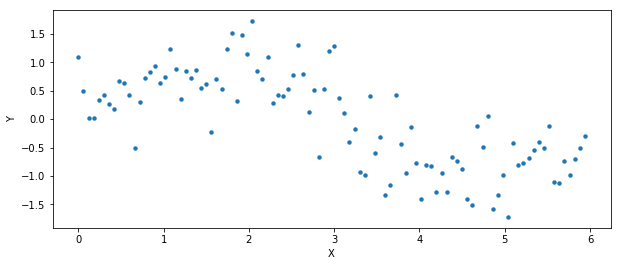

In [ ]:
import numpy, numpy.random, math
def generate_data(n):
    import matplotlib.pyplot as plt
    X = numpy.arange(n)/n*6
    mat = numpy.random.normal(size=(n, 1))/2
    si = numpy.sin(X).reshape((n, 1))
    Y = mat + si
    X = X.reshape((n,1))
    data = numpy.hstack((X, Y))
    return data, X, Y
import pandas
n = 100
data, X, Y = generate_data(n)
df = pandas.DataFrame(data, columns=["X", "Y"])
df.plot(x="X", y="Y", kind="scatter", figsize=(10,4))

## Différents arbres de décision

### max_depth

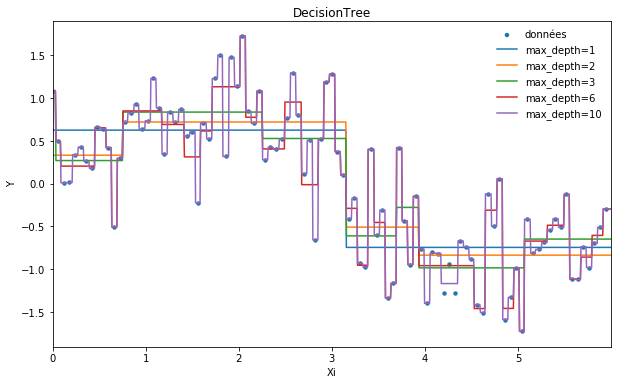

In [ ]:
from sklearn.tree import DecisionTreeRegressor
ax = df.plot(x="X", y="Y", kind="scatter", figsize=(10,6), label="données", title="DecisionTree")
Xi = (numpy.arange(n*10)/n*6/10).reshape((n*10, 1))
for max_depth in [1, 2, 3, 6, 10]:
    clr = DecisionTreeRegressor(max_depth=max_depth)
    clr.fit(X, Y)
    pred = clr.predict(Xi)
    ex = pandas.DataFrame(Xi, columns=["Xi"])
    ex["pred"] = pred
    ex.sort_values("Xi").plot(x="Xi", y="pred", kind="line", label="max_depth=%d" % max_depth, ax=ax)    

### min_samples_split=10

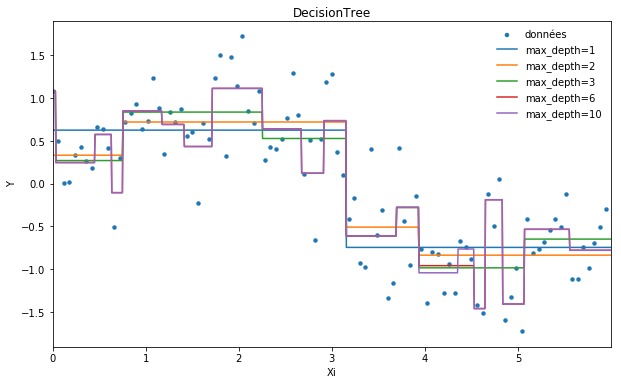

In [ ]:
ax = df.plot(x="X", y="Y", kind="scatter", figsize=(10,6), label="données", title="DecisionTree")
Xi = (numpy.arange(n*10)/n*6/10).reshape((n*10, 1))
for max_depth in [1, 2, 3, 6, 10]:
    clr = DecisionTreeRegressor(max_depth=max_depth, min_samples_split=10)
    clr.fit(X, Y)
    pred = clr.predict(Xi)
    ex = pandas.DataFrame(Xi, columns=["Xi"])
    ex["pred"] = pred
    ex.sort_values("Xi").plot(x="Xi", y="pred", kind="line", label="max_depth=%d" % max_depth, ax=ax)  

## Random Forest

### max_depth

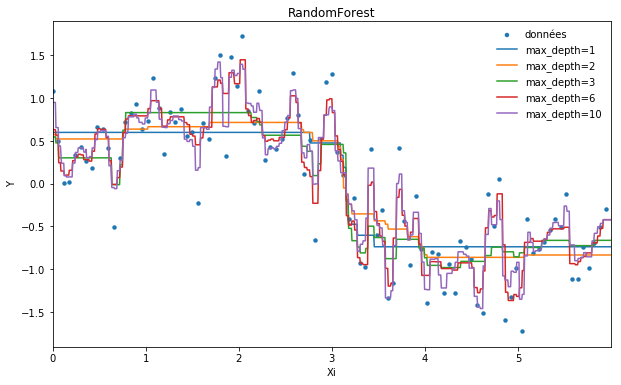

In [ ]:
from sklearn.ensemble import RandomForestRegressor
ax = df.plot(x="X", y="Y", kind="scatter", figsize=(10,6), label="données", title="RandomForest")
Xi = (numpy.arange(n*10)/n*6/10).reshape((n*10, 1))
for max_depth in [1, 2, 3, 6, 10]:
    clr = RandomForestRegressor(max_depth=max_depth)
    clr.fit(X, Y.ravel())
    pred = clr.predict(Xi)
    ex = pandas.DataFrame(Xi, columns=["Xi"])
    ex["pred"] = pred
    ex.sort_values("Xi").plot(x="Xi", y="pred", kind="line", label="max_depth=%d" % max_depth, ax=ax)  

### n_estimators

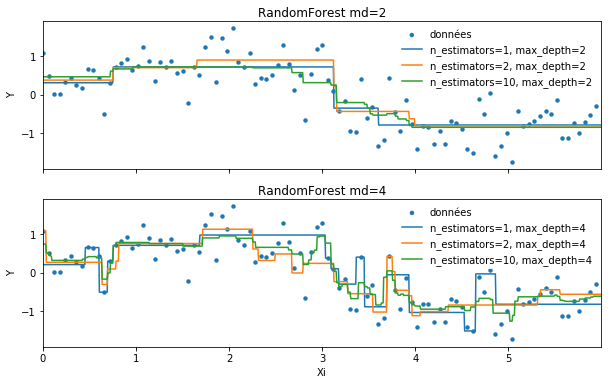

In [ ]:
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
f, axarr = plt.subplots(2, sharex=True)
df.plot(x="X", y="Y", kind="scatter", figsize=(10,6), label="données", title="RandomForest md=2", ax=axarr[0])
df.plot(x="X", y="Y", kind="scatter", figsize=(10,6), label="données", title="RandomForest md=4", ax=axarr[1])
Xi = (numpy.arange(n*10)/n*6/10).reshape((n*10, 1))
for i, max_depth in enumerate([2, 4]):
    for n_estimators in [1, 2, 10]:
        clr = RandomForestRegressor(n_estimators=n_estimators, max_depth=max_depth)
        clr.fit(X, Y.ravel())
        pred = clr.predict(Xi)
        ex = pandas.DataFrame(Xi, columns=["Xi"])
        ex["pred"] = pred
        ex.sort_values("Xi").plot(x="Xi", y="pred", kind="line", 
                                  label="n_estimators=%d, max_depth=%d" % (n_estimators, max_depth), ax=axarr[i])  

### min_samples_split=10

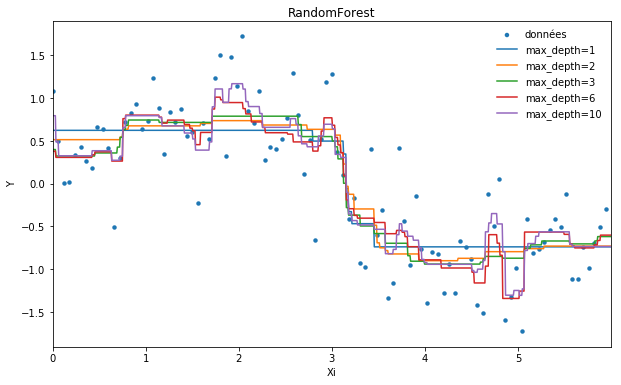

In [ ]:
ax = df.plot(x="X", y="Y", kind="scatter", figsize=(10,6), label="données", title="RandomForest")
Xi = (numpy.arange(n*10)/n*6/10).reshape((n*10, 1))
for max_depth in [1, 2, 3, 6, 10]:
    clr = RandomForestRegressor(max_depth=max_depth, min_samples_split=10)
    clr.fit(X, Y.ravel())
    pred = clr.predict(Xi)
    ex = pandas.DataFrame(Xi, columns=["Xi"])
    ex["pred"] = pred
    ex.sort_values("Xi").plot(x="Xi", y="pred", kind="line", label="max_depth=%d" % max_depth, ax=ax)

## Base d'apprentissage et et base de test

### Decision Tree

In [ ]:
data, X, Y = generate_data(1000)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

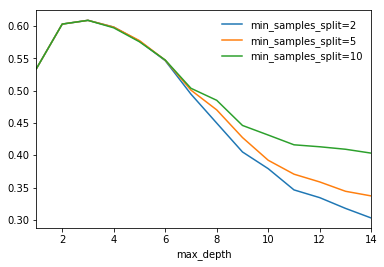

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
min_samples_splits = [2, 5, 10]
rows = []
for max_depth in range(1, 15):
    d = dict(max_depth=max_depth)
    for min_samples_split in min_samples_splits:
        clr = DecisionTreeRegressor(max_depth=max_depth, min_samples_split=min_samples_split)
        clr.fit(X_train, y_train)
        pred = clr.predict(X_test)
        score = r2_score(y_test, pred)
        d["min_samples_split=%d" % min_samples_split] = score
    rows.append(d)
pandas.DataFrame(rows).plot(x="max_depth", y=["min_samples_split=%d" % _ for _ in min_samples_splits])

### Random Forest

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
rows = []
for n_estimators in range(1, 11):
    for max_depth in range(1, 11):
        for min_samples_split in [2, 5, 10]:
            clr = RandomForestRegressor(n_estimators=n_estimators, max_depth=max_depth)
            clr.fit(X_train, y_train.ravel())
            pred = clr.predict(X_test)
            score = r2_score(y_test, pred)
            d = dict(max_depth=max_depth)            
            d["n_estimators"] = n_estimators
            d["min_samples_split"] = min_samples_split
            d["score"] = score
            rows.append(d)
pl = pandas.DataFrame(rows)      
pl.head()

,max_depth,min_samples_split,n_estimators,score
0,1,2,1,0.530712
1,1,5,1,0.525539
2,1,10,1,0.529450
3,2,2,1,0.556298
4,2,5,1,0.564922


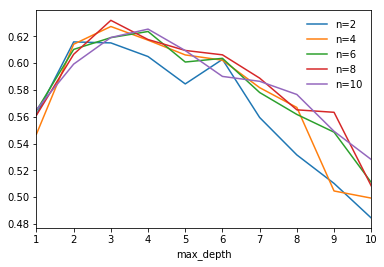

In [ ]:
ax = pl[(pl.min_samples_split==10) & (pl.n_estimators==2)].plot(x="max_depth", y="score", label="n=2")
for i in (4,6,8,10):
    pl[(pl.min_samples_split==10) & (pl.n_estimators==i)].plot(x="max_depth", y="score", label="n=%d"%i, ax=ax)

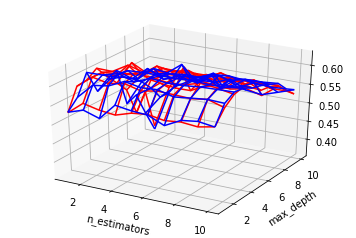

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for v, c in [(2, "b"), (10, "r")]:
    piv = pl[pl.min_samples_split==v].pivot("n_estimators", "max_depth", "score")
    pivX = piv.copy()
    pivY = piv.copy()
    for v in piv.columns: pivX.ix[:, v] = piv.index
    for v in piv.index: pivY.ix[v, :] = piv.columns
    ax.plot_wireframe(pivX.as_matrix(), pivY.as_matrix(), piv.as_matrix(), color=c)
ax.set_xlabel("n_estimators")
ax.set_ylabel("max_depth")

### Réseaux de neurones

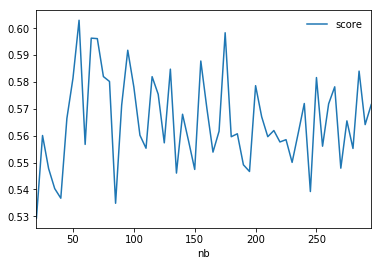

In [ ]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import r2_score
min_samples_splits = [2, 5, 10]
rows = []
for nb in range(20, 300, 5):
    clr = MLPRegressor(hidden_layer_sizes=(nb,), activation="relu", max_iter=400)
    clr.fit(X_train, y_train.ravel())
    pred = clr.predict(X_test)
    score = r2_score(y_test, pred)
    if score > 0:
        d = dict(nb=nb, score=score)
        rows.append(d)
pandas.DataFrame(rows).plot(x="nb", y=["score"])

### Réseaux de neurones, alpha=0

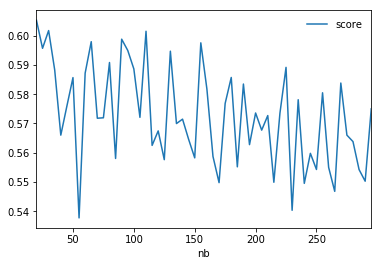

In [ ]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import r2_score
min_samples_splits = [2, 5, 10]
rows = []
for nb in range(20, 300, 5):
    clr = MLPRegressor(hidden_layer_sizes=(nb,), activation="relu", alpha=0, tol=1e-6, max_iter=400)
    clr.fit(X_train, y_train.ravel())
    pred = clr.predict(X_test)
    score = r2_score(y_test, pred)
    if score > 0:
        d = dict(nb=nb, score=score)
        rows.append(d)
pandas.DataFrame(rows).plot(x="nb", y=["score"])

## Exercice 1 : déterminer les paramètres optimaux pour cet exemple

A vérifier avec [grid_search](http://scikit-learn.org/stable/modules/grid_search.html), [hyperopt](https://github.com/hyperopt/hyperopt-sklearn), [cross_validation](http://scikit-learn.org/stable/modules/cross_validation.html).

## Exercice 2 : ajouter quelques points aberrants

## Intervalles de confiance

On utilise le module [forest-confidence-interval](https://github.com/scikit-learn-contrib/forest-confidence-interval). Le module s'appuie sur le [Jackknife](https://en.wikipedia.org/wiki/Jackknife_resampling) pour estimer des intervalles de confiance. Il calcule un estimateur qui calcule une sortie en supprimant plusieurs fois un arbre lors de l'évaluation de la sortie de la forêt aléatoire. La théorie s'appuie sur un *resampling* de la base d'apprentissage que l'article considère comme équivalent à ceux effectués par scikit-learn pour générer chaque arbre.

L'idée s'appuie sur l'article [Confidence Intervals for Random Forests: The Jackknife and the Infinitesimal Jackknife](http://jmlr.csail.mit.edu/papers/volume15/wager14a/wager14a.pdf). Je pense qu'il reste un ou deux bugs car l'algorithme produit parfois des valeurs manquantes qui ne devraient pas se produire et les intervalles de confiance sont parfois très variables d'un apprentissage à l'autre.

In [ ]:
clr = RandomForestRegressor(min_samples_split=2)
clr.fit(X_train, y_train.ravel())

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

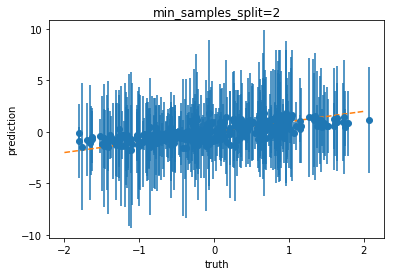

In [ ]:
import forestci
pred = clr.predict(X_test)
mpg_inbag = forestci.calc_inbag(X_train.shape[0], clr)
mpg_V_IJ_unbiased = forestci.random_forest_error(clr, mpg_inbag, X_train, X_test)

plt.errorbar(y_test, pred, yerr=numpy.sqrt(mpg_V_IJ_unbiased), fmt='o')
plt.plot([-2, 2], [-2, 2], '--')
plt.xlabel('truth')
plt.ylabel('prediction')
plt.title("min_samples_split=2")

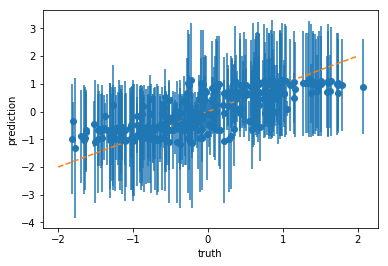

In [ ]:
clr = RandomForestRegressor(n_estimators=40, max_depth=6)
clr.fit(X_train, y_train.ravel())
import forestci
pred = clr.predict(X_test)
mpg_inbag = forestci.calc_inbag(X_train.shape[0], clr)
mpg_V_IJ_unbiased = forestci.random_forest_error(clr, mpg_inbag, X_train, X_test)

plt.errorbar(y_test, pred, yerr=numpy.sqrt(mpg_V_IJ_unbiased), fmt='o')
plt.plot([-2, 2], [-2, 2], '--')
plt.xlabel('truth')
plt.ylabel('prediction')

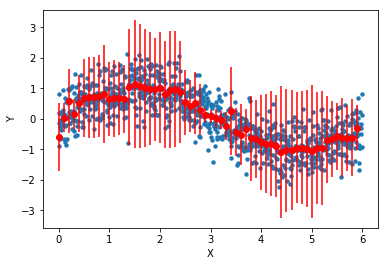

In [ ]:
X_plt = numpy.arange(start=0, stop=6, step=0.1)
X_plt = X_plt.reshape((len(X_plt), 1))
pred = clr.predict(X_plt)
mpg_inbag = forestci.calc_inbag(X_train.shape[0], clr)
mpg_V_IJ_unbiased = forestci.random_forest_error(clr, mpg_inbag, X_train, X_plt)

df = pandas.DataFrame(numpy.hstack((X, Y)), columns=["X", "Y"])
ax = df.plot(x="X", y="Y", kind="scatter")
ax.errorbar(X_plt, pred, yerr=numpy.sqrt(mpg_V_IJ_unbiased), fmt='o', color="r")

plt.xlabel('X')
plt.ylabel('Y')

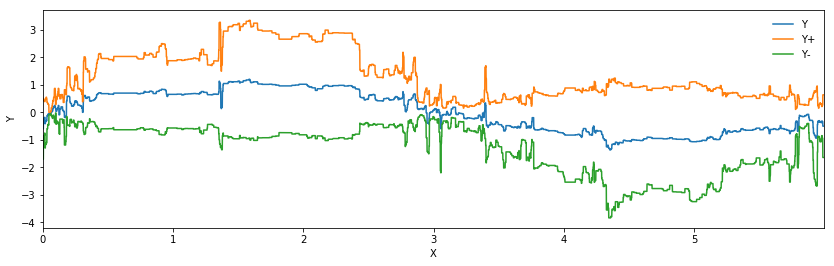

In [ ]:
Xs = numpy.arange(start=0, stop=6, step=0.001)
Xs = Xs.reshape((len(Xs), 1))
ps = clr.predict(Xs)
ps = ps.reshape((len(ps), 1))
ci = forestci.random_forest_error(clr, mpg_inbag, X_train, Xs)
ci = numpy.sqrt(ci).reshape((len(ci), 1))

df = pandas.DataFrame(numpy.hstack((Xs, ps, ps + ci, ps-ci)), columns=["X", "Y", "Y+", "Y-"])
ax = df.plot(x="X", y=["Y", "Y+", "Y-"], kind="line", figsize=(14,4))
plt.xlabel('X')
plt.ylabel('Y')

## XGBoost

In [ ]:
clr = RandomForestRegressor(n_estimators=10, max_depth=2)
clr.fit(X_train, y_train.ravel())

from xgboost import XGBRegressor
clrx = XGBRegressor(n_estimators=10, max_depth=2)
clrx.fit(X_train, y_train.ravel())

XGBRegressor(base_score=0.5, colsample_bylevel=1, colsample_bytree=1, gamma=0,
       learning_rate=0.1, max_delta_step=0, max_depth=2,
       min_child_weight=1, missing=None, n_estimators=10, nthread=-1,
       objective='reg:linear', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)

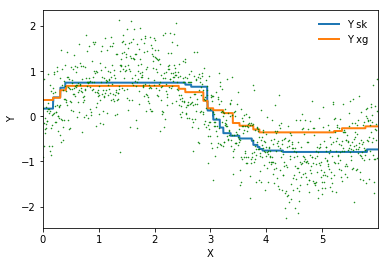

In [ ]:
Xs = numpy.arange(start=0, stop=6, step=0.001)
Xs = Xs.reshape((len(Xs), 1))
ps = clr.predict(Xs)
ps = ps.reshape((len(ps), 1))
psx = clrx.predict(Xs)
psx = psx.reshape((len(psx), 1))

df = pandas.DataFrame(numpy.hstack((Xs, ps, psx)), columns=["X", "Y sk", "Y xg"])
ax = df.plot(x="X", y=["Y sk", "Y xg"], kind="line", lw=2)
ax.plot(X, Y, 'g.', ms=1)
plt.xlabel('X')
plt.ylabel('Y')

## Exercice 3 : optimiser les hyperparamètres pour XGBoost et scikit-learn et comparer